# Intro to Machine Learning Workshop: Act 1

This notebook is part of an Intro to Machine Learning workshop. It was used to generate the diagrams for the slides used in the presentation at the start of the workshop.

---

## Clustering

### Random data

Our first clustering exqample uses the k-means clustering algorithm on a random dataset.

We'll use `numpy` to generate random numbers for the examples, `sklearn` for the clustering implementation, and `matplotlib` to visualise the results.

In [1]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

Since we're doing this in a Jupyter Notebook, we need to configure the notebook to render `matplotlib`'s output inline.

In [2]:
%matplotlib inline

Next, we'll change some `matplotlib` settings to make the images look better on slides with a black background by drawing the axes, ticks, and labels in white. This is purely an aesthetic choice for the presentation, but it serves as a nice example of `matplotlib` configuration.

In [3]:
matplotlib.rc('axes', edgecolor='w')
matplotlib.rc('xtick', color='w')
matplotlib.rc('ytick', color='w')

We want the results to be exactly repeatable, so we'll fix `numpy`'s random number generation seed to make sure we get the same random numbers each time we run this notebook. I picked 42 (because I'm a hoopy frood who really knows where his towel is) but any number would have been fine.

In [5]:
np.random.seed(42)

Next we'll generate the random data for our clustering example.

In [6]:
random_points = np.random.randint(0, 255, size=(100, 2))

We've generated 100 pairs of numbers, which we can plot in a 2D co-ordinate space. This will be the first diagram for our slides.

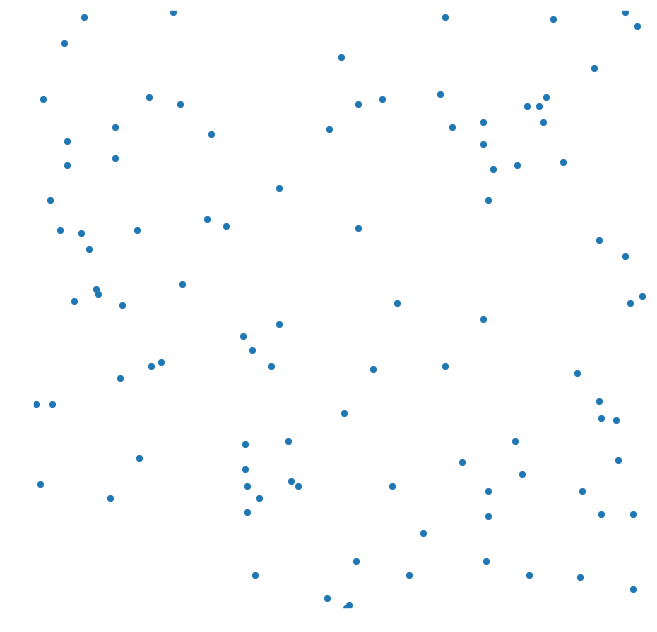

In [7]:
plt.figure(figsize=(11, 11))
plt.scatter(random_points[:, 0], random_points[:, 1])
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.show()

Now we'll run the k-means clustering algorithm over our data. Arbitrarily, I've chosen 3 clusters; since this is just an example, any number is fine.

In [8]:
kmeans = KMeans(n_clusters=3).fit(random_points)

Now our clustering algorithm has found the clusters in the data, we can render a second diagram, this time adding markers for the center of each of our three clusters.

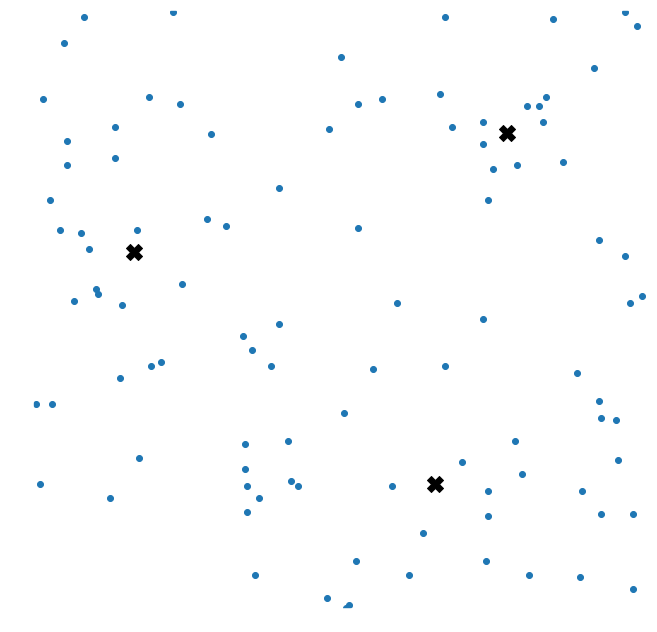

In [9]:
plt.figure(figsize=(11, 11))
plt.scatter(random_points[:, 0], random_points[:, 1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='X', s=256)
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.show()

For our final diagram, we can re-render the points belonging to each cluster in a different style.

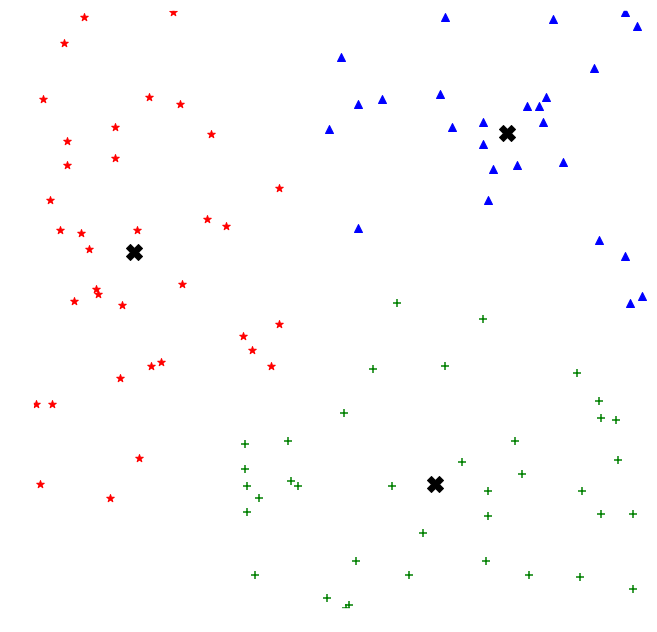

In [10]:
colors = ['red', 'green', 'blue']
markers = ['*', '+', '^']

plt.figure(figsize=(11, 11))
for l in range(3):
    points = random_points[kmeans.labels_ == l]
    plt.scatter(points[:, 0], points[:, 1], color=colors[l], marker=markers[l], s=64)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='X', s=256)
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.show()

### Image colour data

For a more practical examples, let's apply the same clustering technique to the RGB colour data in a photograph.

We'll use PIL to load the image data.

In [11]:
from PIL import Image

Here's a photo of Lindsey, thoughtbot's head of marketing.

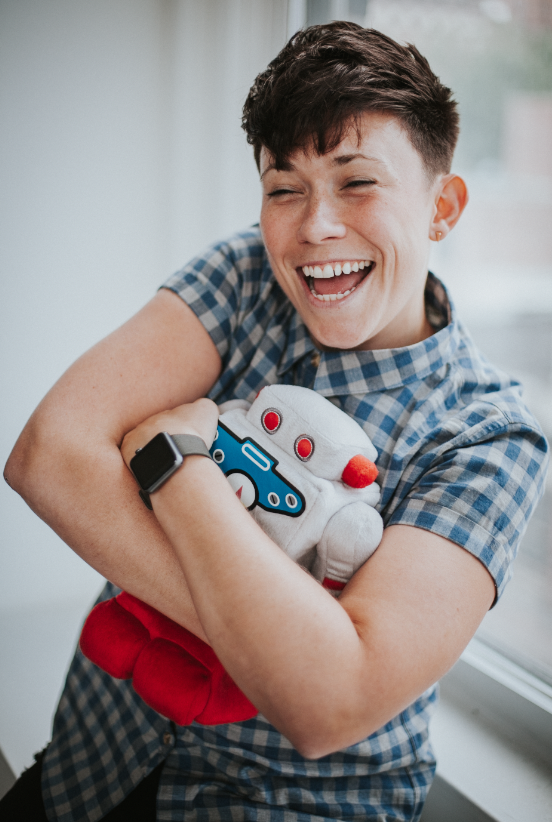

In [12]:
f =  open('../lindsey.png', 'rb')
image = Image.open(f)
image

We can extract the pixel data from the image as a numpy array via the `getdata` method. The indexing we're using on the result (`[:, 0:3]`) is to get only the RGB values from the RGBA data that the method returns.

In [13]:
pixels = np.array(image.getdata())[:, 0:3]

This data can be thought of as points in a 3D space, where the x-axis represents the amount of red, the y-axis green, and the z-axis blue. That 3D space is where we'll be applying the clustering algorithm to see the primary groups of colours in the image.

We can visualise the RGB space on a 3D plot.

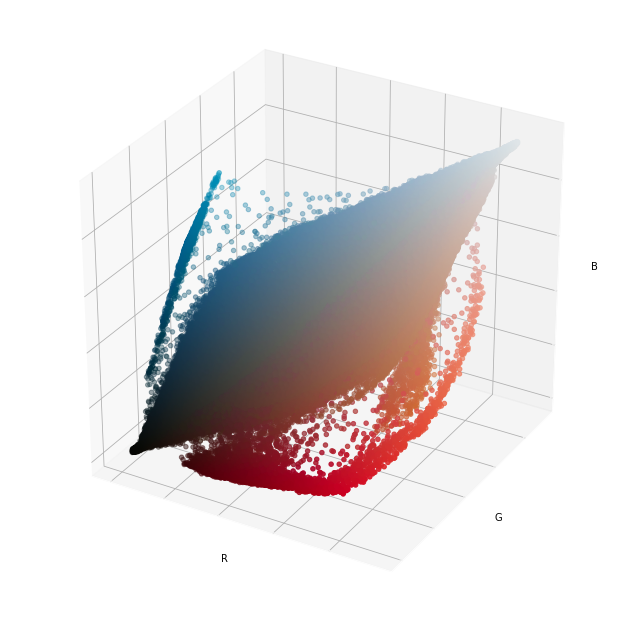

In [28]:
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

r = pixels[:, 0]
g = pixels[:, 1]
b = pixels[:, 2]
c = pixels / 255

fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(r, g, b, c=c)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')

plt.show()

We can apply the same clustering algorithm. We'll use 6 clusters this time, but you could use any number you wanted.

In [14]:
kmeans = KMeans(n_clusters=6).fit(pixels)

What's nice about working with colour data is that each point in the feature space has a clear meaning: it represents a unique colour. That means we can render the colours that are represented by the centres of each cluster.

First, we need to get them into a format that's acceptable to matplotlib: a 3D array where the x- and y-axes are the pixel co-ordinates, and the z-axis contains the RGB values. We also have to divide by 255, because PIL returns RGB values in the range 0–255, and matplotlib expects them in the range 0–1.

In [25]:
cluster_colours = np.expand_dims(kmeans.cluster_centers_, axis=1).reshape(3, 2, 3) / 255

Now we can render the colours that represent the centers of our clusters.

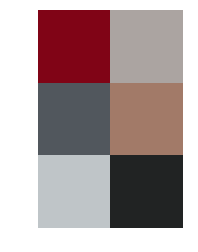

In [26]:
plt.axis('off')
plt.imshow(cluster_colours)

We can also substitute each colour in the image with the colour of the centre point of the cluster it belongs to. That could be useful for compression, or just give us a cool artisitic effect.

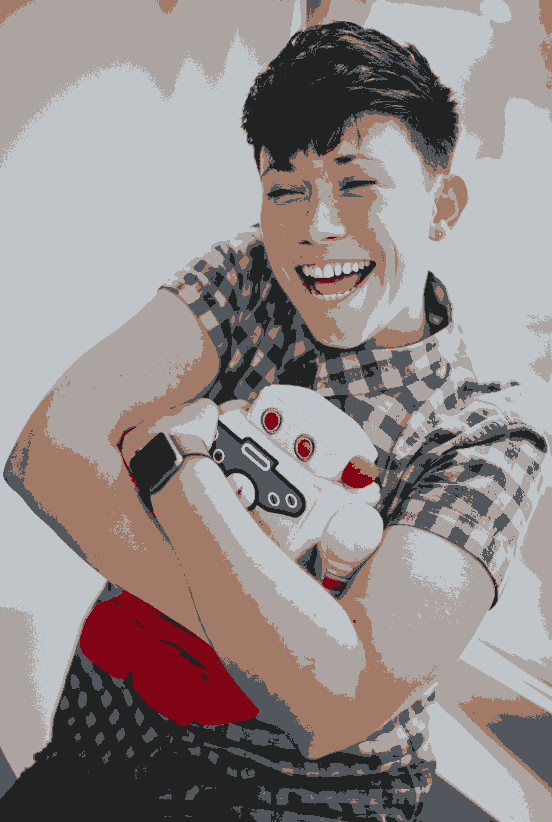

In [29]:
colors = kmeans.cluster_centers_
simple_pixels = np.array([colors[l] for l in kmeans.labels_])
simple_pixels = simple_pixels.reshape(image.size[1], image.size[0], 3)
Image.fromarray(simple_pixels.astype('uint8'), 'RGB')

To make the 3D colour plot more clear, in the presentation I want to show an animated version. This takes a really long time to run, but when it's finished it writes an animated, rotating plot to disk.

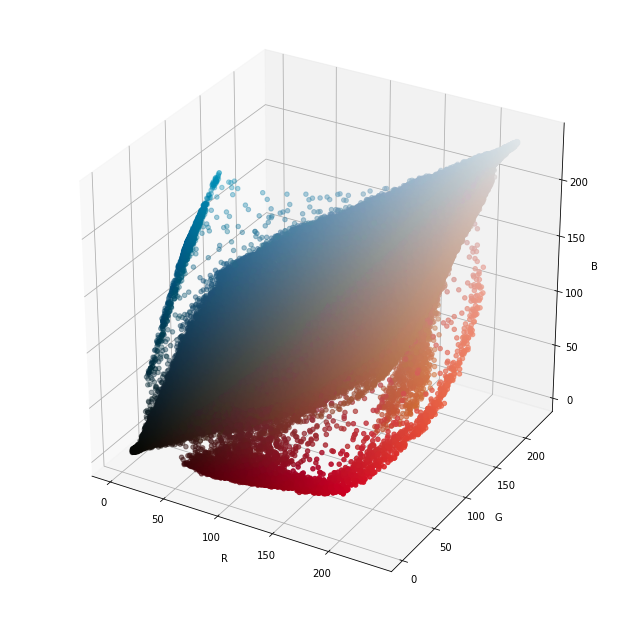

In [201]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

r = pixels[:, 0]
g = pixels[:, 1]
b = pixels[:, 2]
c = pixels / 255

fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(111, projection='3d')

def init():
    pixel_scatter = ax.scatter(r, g, b, c=c)
    ax.set_xlabel('R')
    ax.set_ylabel('G')
    ax.set_zlabel('B')
    return (fig,)

def step(frame):
    angle = frame % 360
    ax.view_init(30, angle)
    return (fig,)

ani = FuncAnimation(fig, step, init_func=init, frames=360)
ani.save('../lindsey-dist-ani.gif', writer='imagemagick', fps=1000/50)